In [1]:
from itertools import combinations, combinations_with_replacement, permutations

import matplotlib.pyplot as plt
import numpy as np

## A)

In [2]:
T = np.array([[0.8, 0.2], [0.2, 0.8]])
E = np.array([[0.5, 0.9], [0.5, 0.1]])


In [3]:
obs = np.array([1, 0, 0, 0, 1, 0, 1, 0])
p_priori = np.array([0.2, 0.8])

total_states = combinations_with_replacement([0, 1], len(obs))
total_states = np.array(list(total_states))


def hidden_states(states, N):
    states_permutation = []
    for i in states:
        p = permutations(i, N)
        p = list(p)
        for j in p:
            if j not in states_permutation:
                states_permutation.append(j)
    return np.array(states_permutation)


hidden_states = hidden_states(total_states, len(obs))
print(len(hidden_states))

256


In [4]:
def prob_states(p_priori, hidden_states, T, E, obs):
    N = len(obs)
    prob = p_priori[hidden_states[0]]

    for i in range(N - 1):
        prob *= T[hidden_states[i + 1], hidden_states[i]]
    for i in range(N):
        prob *= E[obs[i], hidden_states[i]]

    return prob


prob = []
for i in hidden_states:
    prob.append(prob_states(p_priori, i, T, E, obs))

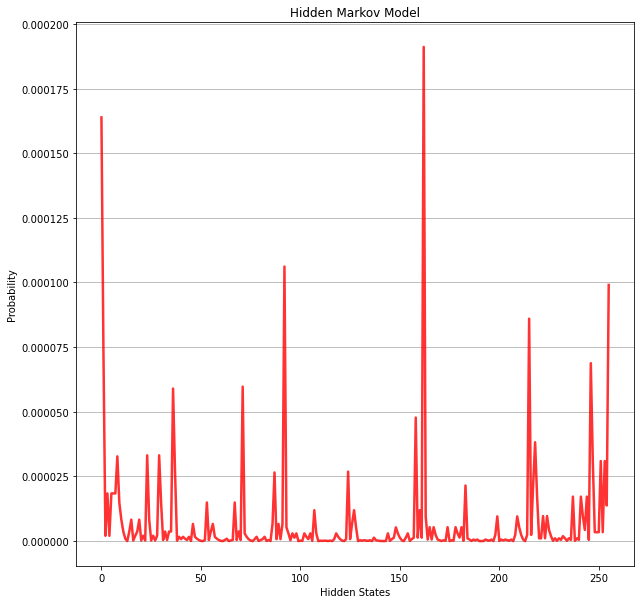

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_title("Hidden Markov Model")
ax.set_xlabel("Hidden States")
ax.set_ylabel("Probability")
ax.yaxis.grid(True)
ax.plot(prob, color="red", linewidth=2.5, alpha=0.8)
plt.show()

## B)

In [6]:
P_vector = np.zeros(len(hidden_states))

for i in range(len(hidden_states)):
    P_vector[i] = prob_states(p_priori, hidden_states[i], T, E, obs)

max_p_index = np.max(P_vector)
max_p = np.where(P_vector == max_p_index)

print("The most probable hidden state is: ", hidden_states[max_p])
print("The probability of the most probable hidden state is: ", max_p_index)

The most probable hidden state is:  [[1 1 1 1 0 0 0 0]]
The probability of the most probable hidden state is:  0.0001911029760000001
